In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# (a)
college = pd.read_csv('College.csv')

# (b)
college2 = pd.read_csv('College.csv', index_col=0) 
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1) 
college3 = college3.set_index('College')
college = college3

college.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
# (c)
college.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

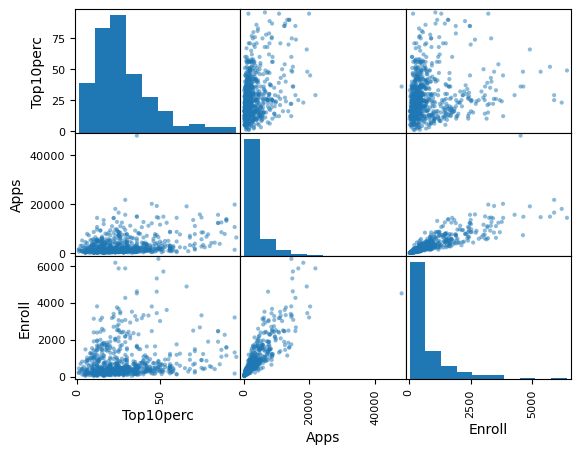

In [9]:
# (d)
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])


<Axes: title={'center': 'Outstate'}, xlabel='Private'>

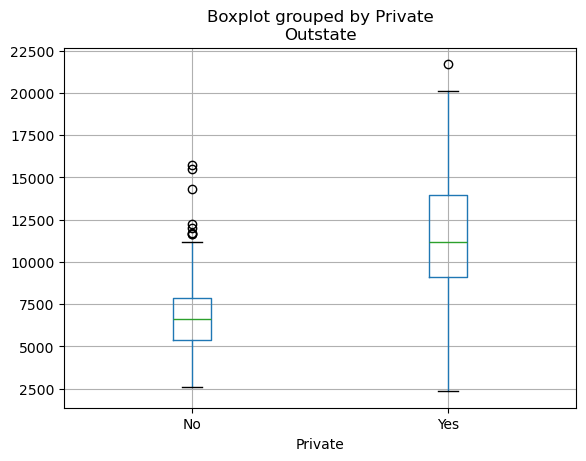

In [10]:
# (e) 
college.boxplot(column='Outstate', by='Private')

Elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

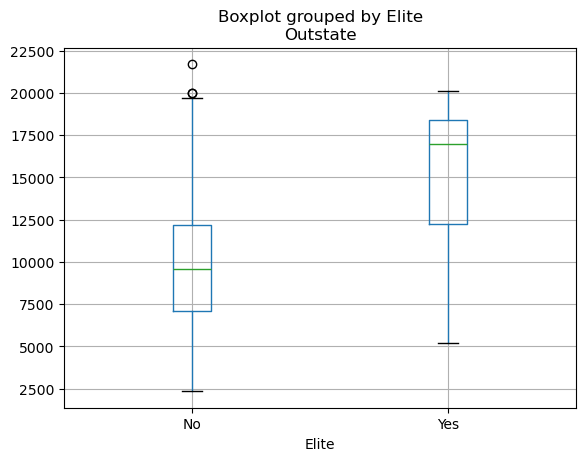

In [12]:
# (f)
college['Elite'] = pd.cut(college['Top10perc'], [0, 50, 100], labels=['No', 'Yes'])
display(college['Elite'].value_counts())

college.boxplot(column='Outstate', by='Elite')

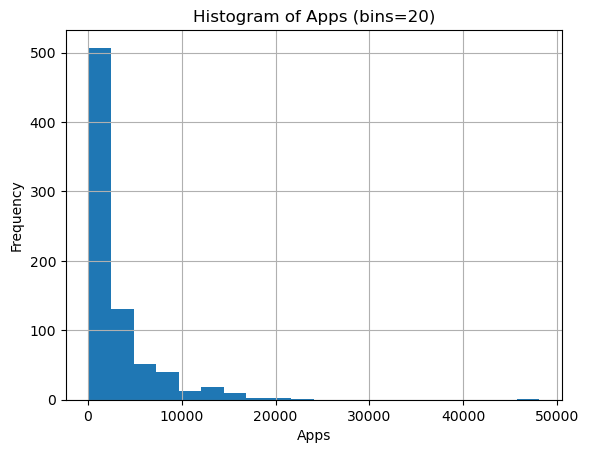

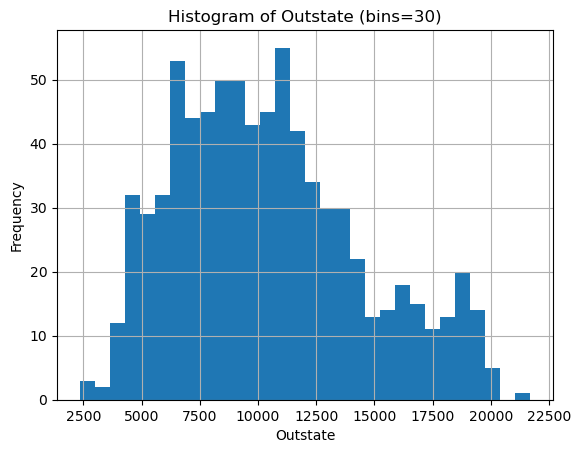

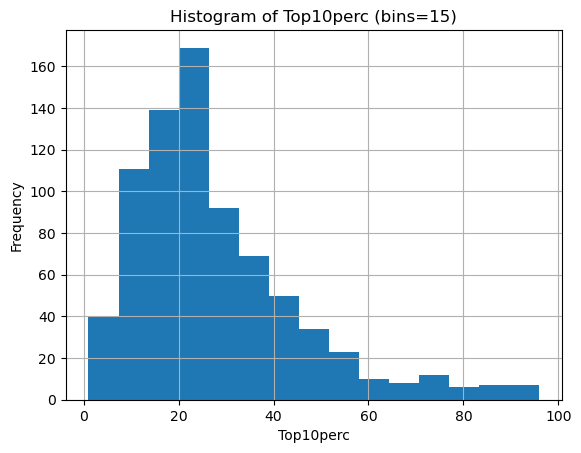

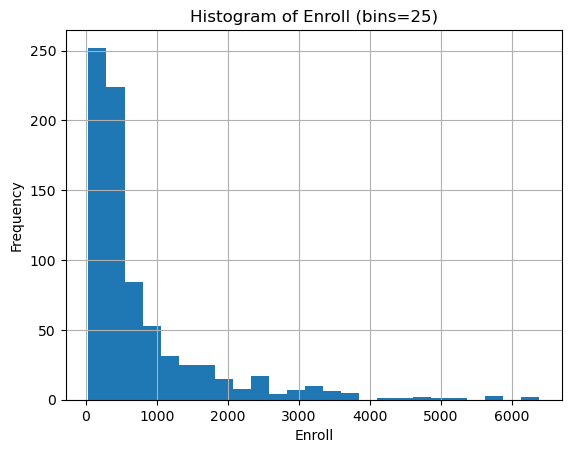

In [13]:
# (g)
for col, bins in [("Apps",20), ("Outstate",30), ("Top10perc",15), ("Enroll",25)]:
    plt.figure()
    college[col].dropna().hist(bins=bins)
    plt.title(f"Histogram of {col} (bins={bins})")
    plt.xlabel(col); plt.ylabel("Frequency"); plt.show()


In [16]:
# (h)
from scipy.stats import skew

cols = ["Apps", "Outstate", "Top10perc", "Enroll"]

stats = pd.DataFrame({
    "Mean": [college[c].mean() for c in cols],
    "Median": [college[c].median() for c in cols],
    "Std": [college[c].std() for c in cols],
    "Skewness": [skew(college[c].dropna()) for c in cols]
}, index=cols)

display(stats)


,Mean,Median,Std,Skewness
Apps,3001.638353,1558.0,3870.201484,3.716557
Outstate,10440.669241,9990.0,4023.016484,0.508294
Top10perc,27.558559,23.0,17.640364,1.410487
Enroll,779.972973,434.0,929.176190,2.685268


### Summary
- **Applications (Apps)** and **Enrollments (Enroll)** are highly right-skewed: a few very large universities receive and enroll tens of thousands, while most schools remain relatively small.  
- **Out-of-State Tuition (Outstate)** is nearly symmetric, mostly between $7,000–15,000, but tuition is notably higher in private and elite schools.  
- **Top10perc (Top 10% of high school class)** shows most schools have 20–30% top students, with only a small group of elite institutions exceeding 70%.  
- **Private vs Public**: Private institutions have a much higher median tuition compared to public ones.  
- **Elite classification**: Defined as schools where more than half of freshmen come from the top 10%. These elite schools are few in number and charge significantly higher tuition.  

    Overall, the dataset highlights clear differences among U.S. colleges in terms of **scale (Apps/Enroll)**, **tuition (Outstate)**, and **academic selectivity (Top10perc/Elite)**. Larger and more selective schools tend to charge higher tuition, which aligns with expectations about elite universities.